In [12]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

### Load dataset

In [13]:
data = load_breast_cancer()
X, y = data.data, data.target

### Split train and test set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Decision Tree learning

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

### Decision (depth=1) Tree learning

In [16]:
clf1 = tree.DecisionTreeClassifier(max_depth=1)
clf1 = clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred1)

### Accuracy

In [17]:
print('------------------ Accuracy ------------------')
print('----------------------------------------------')
print('Decision Tree\t\t Decision Tree (Depth=1)')
print(clf.score(X_test, y_test), '\t', clf1.score(X_test, y_test))

------------------ Accuracy ------------------
----------------------------------------------
Decision Tree		 Decision Tree (Depth=1)
0.9298245614035088 	 0.8859649122807017


### Precision and Recall

In [18]:
print('------------------ Precision ------------------')
print('----------------------------------------------')
print('Decision Tree\t\t Decision Tree (Depth=1)')
print(metrics.precision_score(y_test, y_pred), '\t', metrics.precision_score(y_test, y_pred1))

print('------------------ Recall ------------------')
print('----------------------------------------------')
print('Decision Tree\t\t Decision Tree (Depth=1)')
print(metrics.recall_score(y_test, y_pred), '\t', metrics.recall_score(y_test, y_pred1))

------------------ Precision ------------------
----------------------------------------------
Decision Tree		 Decision Tree (Depth=1)
0.9552238805970149 	 0.9375
------------------ Recall ------------------
----------------------------------------------
Decision Tree		 Decision Tree (Depth=1)
0.927536231884058 	 0.8695652173913043


### Classification Report

In [19]:
print('---------------- Classification Report ----------------')
print('------------------- Decision Tree -------------------')
print(metrics.classification_report(y_test, y_pred))
print('-------------- Decision Tree (Depth=1) --------------')
print(metrics.classification_report(y_test, y_pred1))

---------------- Classification Report ----------------
------------------- Decision Tree -------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        45
           1       0.96      0.93      0.94        69

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

-------------- Decision Tree (Depth=1) --------------
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.94      0.87      0.90        69

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



### Confusion Matrix

In [20]:
print('---------------- Confusion Matrix ----------------')
print('------------------- Decision Tree -------------------')
print(metrics.confusion_matrix(y_test, y_pred))
print('-------------- Decision Tree (Depth=1) --------------')
print(metrics.confusion_matrix(y_test, y_pred1))

---------------- Confusion Matrix ----------------
------------------- Decision Tree -------------------
[[42  3]
 [ 5 64]]
-------------- Decision Tree (Depth=1) --------------
[[41  4]
 [ 9 60]]


### ROC Curve

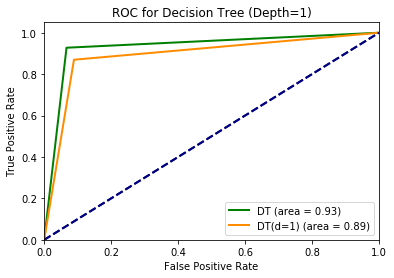

In [21]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='green', lw=lw, label='DT (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree')
plt.legend(loc="lower right")

plt.plot(fpr1, tpr1, color='darkorange', lw=lw, label='DT(d=1) (area = %0.2f)' % metrics.auc(fpr1, tpr1))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree (Depth=1)')
plt.legend(loc="lower right")
plt.show()

### Precision/Recall Curve

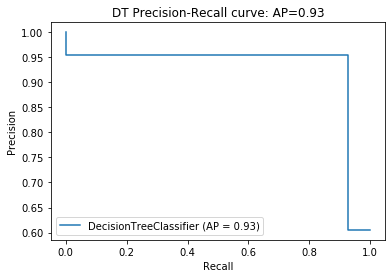

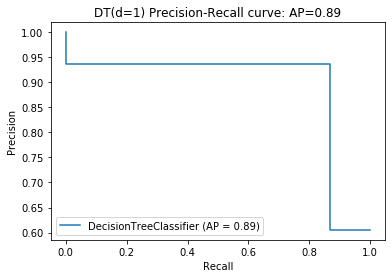

In [22]:
average_precision = metrics.average_precision_score(y_test, y_pred)
disp = metrics.plot_precision_recall_curve(clf, X_test, y_test)
disp.ax_.set_title('DT Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


average_precision1 = metrics.average_precision_score(y_test, y_pred1)
disp1 = metrics.plot_precision_recall_curve(clf1, X_test, y_test)
disp1.ax_.set_title('DT(d=1) Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision1))

plt.show()